In [3]:
!pip install scikit-learn



     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 178.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 178.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 190.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.0/11.0 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.0/11.0 MB 991.0 kB/s eta 0:00

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv('historical_data.csv')

In [7]:
print(data.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000


In [8]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
data.fillna(method='ffill', inplace=True)

C:\Users\Razi\AppData\Local\Temp\ipykernel_23616\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [14]:
X = data.drop('Low', axis=1)
y = data['Low']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()

In [17]:
data['Date'] = pd.to_datetime(data['Date'])

In [18]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [19]:
data = data.drop('Date', axis=1)

In [21]:
X = data.drop('Low', axis=1)
y = data['Low']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.01864257305391565
R-squared: 0.9998911581327841


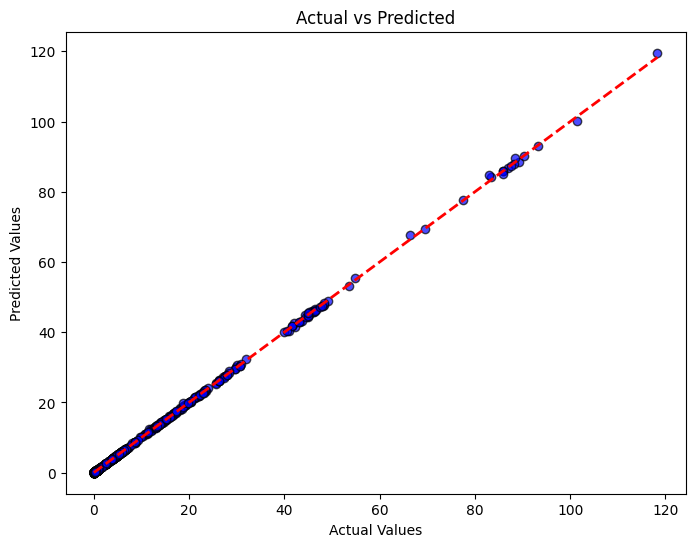

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()